In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold

In [186]:
data = pd.read_csv("data/data.csv", header=0) #Lee el dataset de pacientes

In [187]:
data.shape #Imprimer la dimensionalidad de la muestra

(569, 33)

In [188]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [189]:
data.head() #Muestra los 5 primeros datos con sus características

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [190]:
data.drop("Unnamed: 32",axis=1,inplace=True) #Elimina la columna 32 puesto que es inservible
data.drop("id",axis=1,inplace=True) #Elimina la columna 1 puesto que el ID es irrelevante para el estudio

In [191]:
features_mean= list(data.columns[1:11]) #Crea una lista con los valores geométricos medios recopilados
features_se= list(data.columns[11:20]) #Crea una lista con los valores geométricos mejor recopilados
features_worst=list(data.columns[21:31]) #Crea una lista con los valores recopilados luego de empeorar

In [192]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) #Mapea la columna de diagnosis, asignando a
                                                       #tumoles malignos el valo 1, y a benignos el 0.

In [194]:
data.describe() #Muestra la estadística descriptiva de la muestra.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [195]:
print(data.drop(data.columns[6:31], axis=1).describe().round(2).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  diagnosis &  radius\_mean &  texture\_mean &  perimeter\_mean &  area\_mean &  smoothness\_mean \\
\midrule
count &     569.00 &       569.00 &        569.00 &          569.00 &     569.00 &           569.00 \\
mean  &       0.37 &        14.13 &         19.29 &           91.97 &     654.89 &             0.10 \\
std   &       0.48 &         3.52 &          4.30 &           24.30 &     351.91 &             0.01 \\
min   &       0.00 &         6.98 &          9.71 &           43.79 &     143.50 &             0.05 \\
25\%   &       0.00 &        11.70 &         16.17 &           75.17 &     420.30 &             0.09 \\
50\%   &       0.00 &        13.37 &         18.84 &           86.24 &     551.10 &             0.10 \\
75\%   &       1.00 &        15.78 &         21.80 &          104.10 &     782.70 &             0.11 \\
max   &       1.00 &        28.11 &         39.28 &          188.50 &    2501.00 &             0.16 \\
\bottomrule
\end{tabular}

/home/diego/main-environment/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

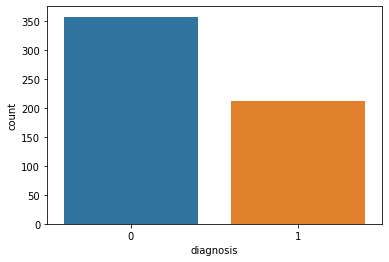

In [196]:
sns.countplot(data['diagnosis'],label="Count") #Cuenta la cantidad de Benignos y la de Malignos.

<AxesSubplot:>

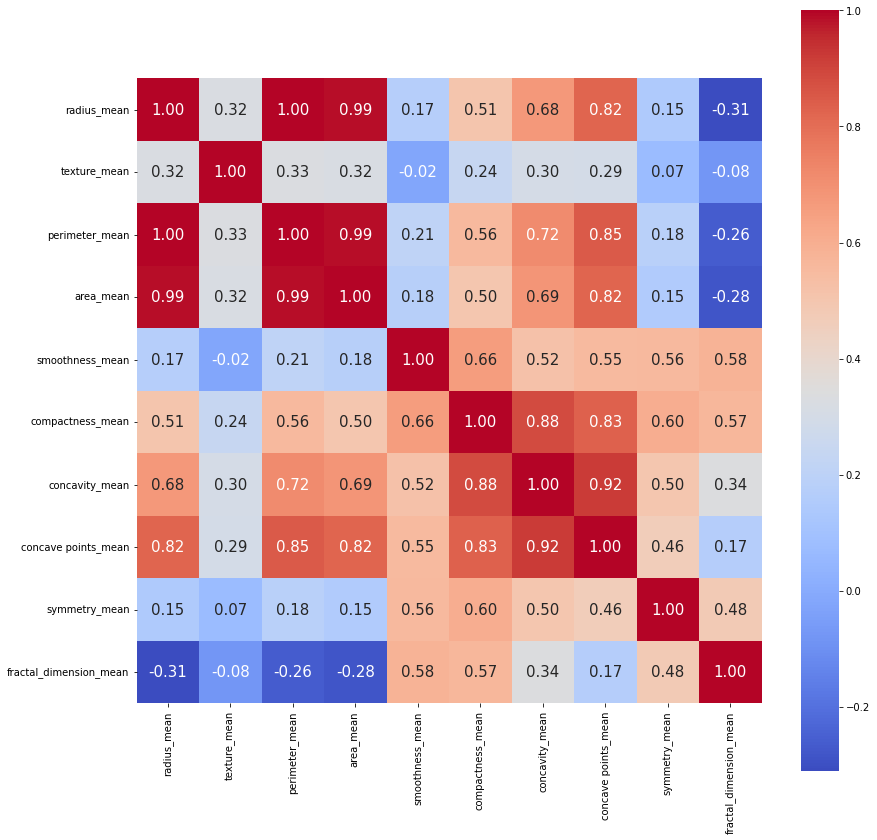

In [197]:
corr = data[features_mean].corr() # Encuentra correlación entre los valores de las caractrísticas medias.
plt.figure(figsize=(14,14)) #Tamaño de figura
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') #Desarrolla la correlación de los valores medios.

In [206]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
#Lista con características que ayudarán con la predicción.

In [207]:
train, test = train_test_split(data, test_size = 0.3) #Divide el conjunto de datos en dos lista aleatorias.
                                                      #La de test tendrá el 30% de los datos.

In [208]:
test.shape #Dimensionalidad

(171, 31)

In [209]:
train_X = train[prediction_var] #Selecciona las columnas de predicción de la lista train definida anteriormente.
train_y = train.diagnosis #Selecciona solo la columna de diagnosis (Maligno o Benigno) de la lista train.
test_X = test[prediction_var] #Selecciona las columnas de predicción de la lista test definida anteriormente.
test_y =test.diagnosis #Selecciona solo la columna de diagnosis (Maligno o Benigno) de la lista test.

In [264]:
model = RandomForestClassifier(n_estimators=100) #A random forest is a meta estimator that fits a number 
                                                 #of decision tree classifiers on various sub-samples of 
                                                 #the dataset and uses averaging to improve the predictive 
                                                 #accuracy and control over-fitting. The sub-sample size is 
                                                 #controlled with the max_samples parameter if bootstrap=True 
                                                 #(default), otherwise the whole dataset is used to build each tree.

In [265]:
model.fit(train_X,train_y) #Ajusta el modelo acorde a la listas train predefinidas.
prediction = model.predict(test_X)  #Predice los resultados respecto de la lista de variables a considerar.
metrics.accuracy_score(prediction,test_y) #Mide qué tan buena ha sido la predicción de manera normalizada.

0.9415204678362573

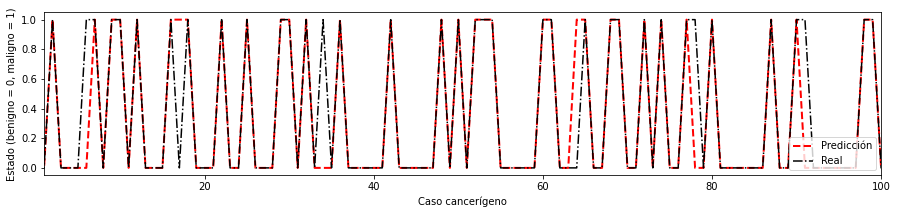

In [266]:
plt.figure(figsize=(15,3))
plt.plot(range(len(prediction)), prediction, c = 'red', ls = '--', lw = 2, label = 'Predicción')
plt.plot(range(len(test_y)), test_y, c = 'black', ls = '-.', label = 'Real')
plt.xlim([1, 100])
plt.xlabel('Caso cancerígeno')
plt.ylabel('Estado (benigno = 0, maligno = 1)')
plt.legend(loc ="lower right")

In [267]:
model = svm.SVC() #Probando con otro tipo de predicción (SVM)
model.fit(train_X,train_y) #Ajusta el modelo acorde a la listas train predefinidas.
prediction = model.predict(test_X) #Predice los resultados respecto de la lista de variables a considerar.
metrics.accuracy_score(prediction,test_y) #Mide qué tan buena ha sido la predicción de manera normalizada.

0.9181286549707602

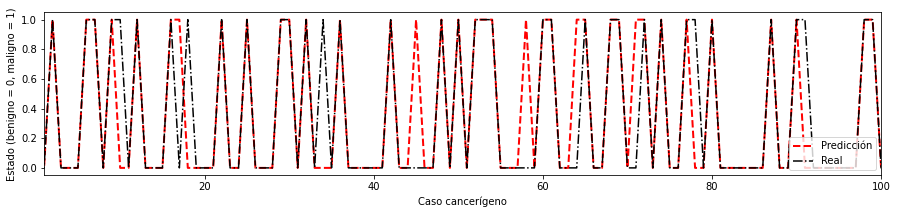

In [268]:
plt.figure(figsize=(15,3))
plt.plot(range(len(prediction)), prediction, c = 'red', ls = '--', lw = 2, label = 'Predicción')
plt.plot(range(len(test_y)), test_y, c = 'black', ls = '-.', label = 'Real')
plt.xlim([1, 100])
plt.xlabel('Caso cancerígeno')
plt.ylabel('Estado (benigno = 0, maligno = 1)')
plt.legend(loc ="lower right")

In [78]:
prediction_var = features_mean #Ajusta los valores de predicción ahora a todas las variables medias.

In [79]:
train_X= train[prediction_var] #Redefine train con todos los valores de la media
test_X = test[prediction_var] #Redefine test con todos los valores de la media

In [80]:
model=RandomForestClassifier(n_estimators=100) #Nuevamente genera árboles de decisión

In [87]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9649122807017544

In [23]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
#Calcula el nivel de importancia de todas las características usadas para la predicción.
print(featimp) #Imprime lo anteiormente mencionado.

concave points_mean       0.283929
area_mean                 0.179981
perimeter_mean            0.179789
concavity_mean            0.107378
radius_mean               0.079308
texture_mean              0.062054
compactness_mean          0.041041
smoothness_mean           0.028989
symmetry_mean             0.020273
fractal_dimension_mean    0.017258
dtype: float64


In [270]:
print(featimp.to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
perimeter\_worst         &  0.232512 \\
radius\_worst            &  0.218007 \\
area\_worst              &  0.180518 \\
concave points\_worst    &  0.170505 \\
concavity\_worst         &  0.066761 \\
smoothness\_worst        &  0.034127 \\
texture\_worst           &  0.028560 \\
compactness\_worst       &  0.027579 \\
symmetry\_worst          &  0.020818 \\
fractal\_dimension\_worst &  0.020613 \\
\bottomrule
\end{tabular}



In [88]:
model = svm.SVC() #Desarrolla lo mismo con el método SVM nuevamente.
model.fit(train_X,train_y) #Ajusta el modelo.
prediction=model.predict(test_X) #Desarrolla la predicción.
metrics.accuracy_score(prediction,test_y) #Mide el grado de exactitud.

0.8947368421052632

In [90]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']
#Redefine las característica a estudiar, de acuerdo a la tasa de importancia mostrada anteriormente.

In [91]:
train_X= train[prediction_var] #Escoge los valores de train a los de la lista nueva
test_X = test[prediction_var] #Escoge los valores de test a los de la lista nueva

In [92]:
model=RandomForestClassifier(n_estimators=100) #Nuevamente, desarrolla árboles de decisión.
model.fit(train_X,train_y) #Ajusta el modelo.
prediction = model.predict(test_X) #Desarrolla la predicción.
metrics.accuracy_score(prediction,test_y) #Mide el grado de exactidud.

0.935672514619883

In [94]:
model = svm.SVC() #Hace lo mismo con el método SVM
model.fit(train_X,train_y) #Ajusta el modelo
prediction=model.predict(test_X) #Predice
metrics.accuracy_score(prediction,test_y) #Mide el grado de exactitud.

0.8947368421052632

In [95]:
prediction_var = features_worst #Ajusta el modelo de acuerdo a las característica peores

In [96]:
train_X= train[prediction_var] #Redefine train con respecto de dichas características
test_X = test[prediction_var] #Redefine test con respecto de dichas características

In [97]:
model = svm.SVC() #Árboles de decisión con el método SVM.
model.fit(train_X,train_y) #Ajusta el modelo.
prediction = model.predict(test_X) #Predice valores.
metrics.accuracy_score(prediction,test_y) #Mide el grado de exactitud.

0.9122807017543859

In [108]:
model=RandomForestClassifier(n_estimators=100) #Hace lo mismo el primer método.
model.fit(train_X,train_y) #Ajusta el modelo
prediction = model.predict(test_X) #Predice
metrics.accuracy_score(prediction,test_y) #Mide el grado de exactitud.

0.9532163742690059

In [110]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
#Calcula el nivel de importancia de todas las características usadas para la predicción.
print(featimp) #Imprime lo anteiormente mencionado.

perimeter_worst            0.232512
radius_worst               0.218007
area_worst                 0.180518
concave points_worst       0.170505
concavity_worst            0.066761
smoothness_worst           0.034127
texture_worst              0.028560
compactness_worst          0.027579
symmetry_worst             0.020818
fractal_dimension_worst    0.020613
dtype: float64


In [111]:
prediction_var = ['concave points_worst','radius_worst','area_worst','perimeter_worst','concavity_worst']
#Redefine los valores respecto de los que toman mayor relevancia.

In [112]:
train_X= train[prediction_var] #Redefine train
test_X = test[prediction_var] #Redefine test

In [113]:
model=RandomForestClassifier(n_estimators=100) #Desarrolla árboles de decisión.
model.fit(train_X,train_y) #Ajusta el modelo
prediction = model.predict(test_X) #Predice
metrics.accuracy_score(prediction,test_y) #Calcula exactitud de predicción.

0.9590643274853801

In [115]:
model = svm.SVC() #Hace lo mismo con SVM
model.fit(train_X,train_y) #Ajusta el modelo
prediction=model.predict(test_X) #Predice
metrics.accuracy_score(prediction,test_y) #Mide el grado de exactitud.

0.9122807017543859

In [284]:
data[features_mean].columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

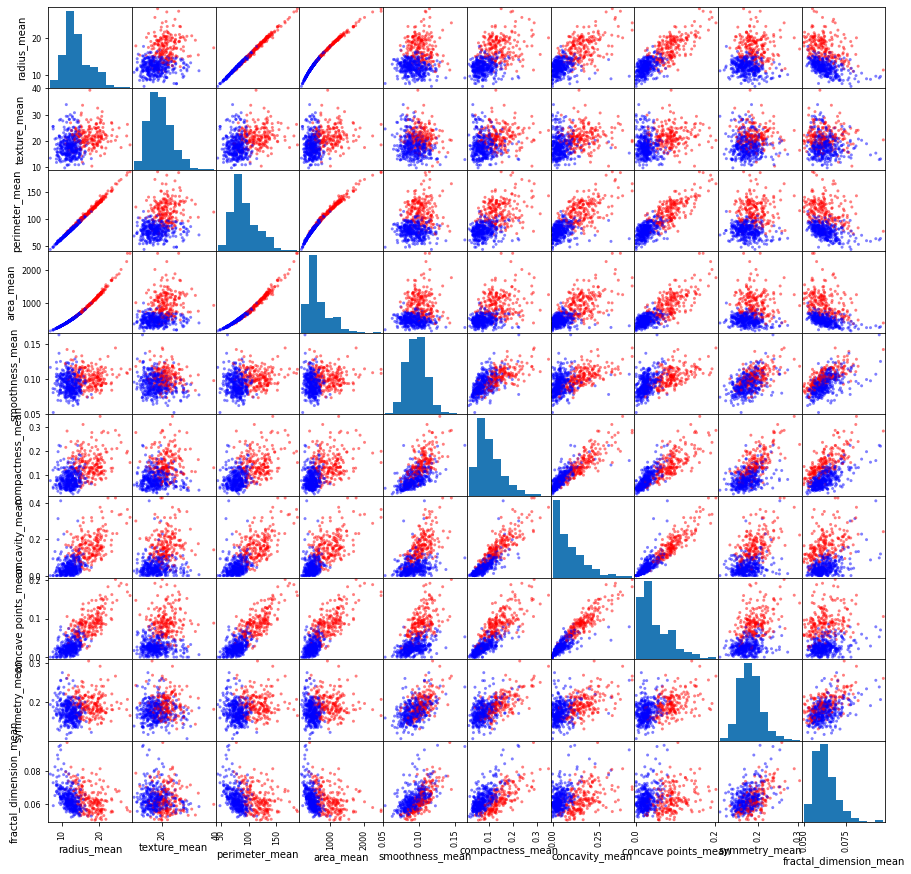

In [288]:
color_function = {0: "blue", 1: "red"} #Muestra la clasificación "benigno" como azul y la "maligno" como roja
colors = data["diagnosis"].map(lambda x: color_function.get(x))
pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); #Grafica el scatter

In [116]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [137]:
def model(model,data,prediction,outcome):
    kf = KFold(data.shape[0], n_folds=10)

In [142]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [143]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var = "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%


TypeError: __init__() got multiple values for argument 'n_splits'